In [15]:
#bq clustering
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
from pydoc import doc
import re 
import os
from collections import Counter
import pandas as pd
from tqdm import tqdm
import numpy as np
import ast


In [16]:
fname_prefix = "/data/users/team2_capstone/code-style-probing/"

#clean_metrics_df = pd.read_csv("data/bigquery_metric_20220526.csv")
clean_metrics_df = pd.read_csv(fname_prefix + "data/bigquery_metric_dedup_file_20220530/bigquery_metric_dedup_file0_20220530.csv")
#os.listdir("data")
bq_metric_files = [
    #'bigquery_metric_dedup_file0_20220530.csv',
    'py150k_metric_20220527.csv',
    'bigquery_metric_dedup_file_20220530/bigquery_metric_dedup_file1_20220530.csv',
    'bigquery_metric_dedup_file_20220530/bigquery_metric_dedup_file2_20220530.csv',
    'bigquery_metric_dedup_file_20220530/bigquery_metric_dedup_file3_20220530.csv',
    'bigquery_metric_dedup_file_20220530/bigquery_metric_dedup_file4_20220530.csv',
    'bigquery_metric_dedup_file_20220530/bigquery_metric_dedup_file5_20220530.csv',
    'bigquery_metric_dedup_file_20220530/bigquery_metric_dedup_file6_20220530.csv',
    'bigquery_metric_dedup_file_20220530/bigquery_metric_dedup_file7_20220530.csv',
    'bigquery_metric_dedup_file_20220530/bigquery_metric_dedup_file8_20220530.csv',
    'bigquery_metric_dedup_file_20220530/bigquery_metric_dedup_file9_20220530.csv' 
 ]

for file in bq_metric_files:
    temp_df = pd.read_csv(f'{fname_prefix}data/{file}')
    clean_metrics_df = pd.concat((clean_metrics_df , temp_df))
#os.listdir("data")
display(clean_metrics_df)

,repository,filepath,forks,issue_events,stars,parse_error,line_count,comment_count,comment_avg_len,comment_density,...,func_async_count,generators,lower_case_class,snake_case_class,upper_camel_case_method,other_case_method,upper_case_class,lower_camel_case_class,upper_case_method,path
0,jbkalmbach/kbmod,analysis/rawGenerated/batchGenerate.py,1.0,32.0,1.0,1.0,51.0,0.0,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pymedusa/SickRage,medusa/providers/torrent/rss/rsstorrent.py,22.0,763.0,27.0,1.0,170.0,8.0,17.625000,0.047059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ipdata/python,ipdata/test_cli.py,6.0,15.0,16.0,1.0,135.0,34.0,37.352941,0.251852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,demisto/content,Packs/AnsibleLinux/Integrations/AnsibleACME/An...,1328.0,52.0,797.0,1.0,59.0,11.0,26.818182,0.186441,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,hidat/audio_pipeline,review_parser/mb_release.py,1.0,26.0,4.0,1.0,76.0,12.0,37.166667,0.157895,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87927,operepo/ope,libs/gluon/packages/dal/pydal/adapters/sqlite.py,8.0,138.0,9.0,1.0,279.0,14.0,43.857143,0.050179,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,2.0,NaN
87928,DOV-Vlaanderen/pydov,setup.py,17.0,287.0,31.0,1.0,66.0,3.0,25.666667,0.045455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87929,slogan621/tscharts,apps/xrayuploader/xrayuploader.py,8.0,97.0,16.0,1.0,502.0,20.0,49.300000,0.039841,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
87930,seasonstar/bibi,application/models/order/logistic.py,365.0,12.0,1016.0,1.0,434.0,1.0,23.000000,0.002304,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#internal metrics are generated now and everything is stored in dataframe should be ready for clustering
target_features = ["comment_density", "snake_case_ratio", "lower_camel_case_ratio", "upper_camel_case_ratio", "func_decorators_avg", "class_decorators_avg",
 "ds_density", "class_parents_ratio"]
target_features = [
    "snake_case_var_ratio", 
    "snake_case_method_ratio",
    "snake_case_class_ratio",
    "upper_camel_case_var_ratio",
    "upper_camel_case_method_ratio",
    "upper_camel_case_class_ratio",
    "lower_camel_case_var_ratio",
    "lower_camel_case_method_ratio",
    "lower_camel_case_class_ratio",
    "func_decorators_avg",
    "class_decorators_avg",
    "class_parents_avg",
    "ds_density",
    "comment_density",
    "comprehensions_avg",
    "generators_avg",
    "lambda_avg",
]
#add generators 

#store params and dataframe for reproducability

#change feature set to store as a different experiment
feature_set = 'feature_set_9'
min_samples = 500
min_cluster_size = 2500
cluster_selection_epsilon = 0.01
#get filename and the features


X = clean_metrics_df[target_features].to_numpy()
X = np.nan_to_num(X, nan=0)

print (len(clean_metrics_df))

975096


In [18]:
#%pip install -U scikit-learn

In [19]:
from sklearn.cluster import DBSCAN
import numpy as np
import hdbscan
#import seaborn as sns
from sklearn.manifold import TSNE
import pickle


In [20]:
clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, 
                            cluster_selection_epsilon=cluster_selection_epsilon, prediction_data=True).fit(X)
"""with open(fname_prefix + f'data/BigQuery/clusters/{feature_set}/full_feature_clusterer_preds.pickle', 'rb') as handle:
    clusterer = pickle.load(handle)
print(len(clusterer.labels_))"""

In [ ]:
with open(fname_prefix + f'data/BigQuery/clusters/{feature_set}/full_feature_clusterer_preds.pickle', 'wb') as handle:
    pickle.dump(clusterer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:


#clustering = DBSCAN(eps=3, min_samples=2)
#clustering.fit_predict(X)




#labels = hdbscan.approximate_predict(clusterer, X)
#labels = hdbscan.approximate_predict(clusterer, X)
labels = clusterer.labels_
print(len(labels))
print (set(labels))
#with open(f'data/BigQuery/clusters/{feature_set}/full_feature_clusterer_preds.pickle', 'wb') as handle:
#    pickle.dump(clusterer, handle, protocol=pickle.HIGHEST_PROTOCOL)


"""color_palette = sns.color_palette('Paired', 110000)
print(len(color_palette))

cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  #for x in labels[0]]
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                          #zip(cluster_colors, labels[1])]
                         zip(cluster_colors, clusterer.probabilities_)]"""

#save hyperparams + meta info for experiment
with open(fname_prefix + f'data/BigQuery/clusters/{feature_set}/feature_list_params.txt', 'w') as f:
    f.write(f"Hyperparameters: min_samples={min_samples}, min_cluster_size={min_cluster_size}, \
        cluster_selection_epsilon={cluster_selection_epsilon}, prediction_data=True\n")
    f.write("Features:\n")
    for item in target_features:
        f.write(f"{item}\n")
    f.write(f"Full feature cluster count: {len(set(clusterer.labels_))}\n")

975096
110000


In [ ]:
from sklearn.manifold import TSNE
try:
    projection = np.loadtxt(f'data/BigQuery/clusters/feature_set_10/projection.txt')
except:
    projection = TSNE().fit_transform(X)
    np.savetxt(f'data/BigQuery/clusters/{feature_set}/projection.txt', projection)

In [ ]:
from sklearn.metrics import  davies_bouldin_score
"""experiments = os.listdir('data/BigQuery/clusters/')
for experiment in experiments:
    with open(f'data/BigQuery/clusters/{experiment}/full_feature_clusterer.pickle', 'rb') as handle:
        clusterer_from_file = pickle.load(handle)
    print(experiment)
    print (clusterer_from_file)

    print("Number of clusters:", np.unique(clusterer_from_file.labels_).shape)
    # report the DB Index
    print("DB Index:", davies_bouldin_score(X, clusterer_from_file.labels_))"""

'experiments = os.listdir(\'data/BigQuery/clusters/\')\nfor experiment in experiments:\n    with open(f\'data/BigQuery/clusters/{experiment}/full_feature_clusterer.pickle\', \'rb\') as handle:\n        clusterer_from_file = pickle.load(handle)\n    print(experiment)\n    print (clusterer_from_file)\n\n    print("Number of clusters:", np.unique(clusterer_from_file.labels_).shape)\n    # report the DB Index\n    print("DB Index:", davies_bouldin_score(X, clusterer_from_file.labels_))'

number of clusters (71,)
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, -1}
DB Index: 1.0854163664154532
110000
{(0.9921568627450981, 0.7490196078431373, 0.43529411764705883), (0.984313725490196, 0.6039215686274509, 0.6), (0.8901960784313725, 0.10196078431372549, 0.10980392156862745), (0.2, 0.6274509803921569, 0.17254901960784313), (1.0, 1.0, 0.6), (0.6941176470588235, 0.34901960784313724, 0.1568627450980392), (0.41568627450980394, 0.23921568627450981, 0.6039215686274509), (1.0, 0.4980392156862745, 0.0), (0.6509803921568628, 0.807843137254902, 0.8901960784313725), (0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.792156862745098, 0.6980392156862745, 0.8392156862745098), (0.6980392156862745, 0.8745098039215686, 0.5411764705882353)}


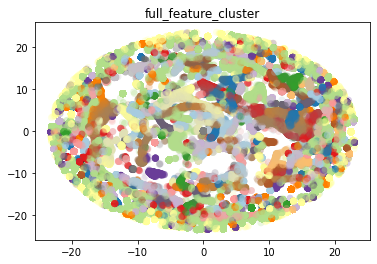

In [ ]:
exclusion_list =[-1]#[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, -1]#[ 8, 9, 10, 11, 12, 13, 14, 15, 16, -1]
print ("number of clusters", np.unique(clusterer.labels_).shape)
print (set(clusterer.labels_))
print("DB Index:", davies_bouldin_score(X, clusterer.labels_))
#print (*projection.T)
color_palette = sns.color_palette('Paired', 110000)
print(len(color_palette))
print (set (color_palette))
#removes -1 cluster
noise_removed = np.empty((975096, 2)) #875096
for i in range (0, 975096):#len(projection)):
    if clusterer.labels_[i] not in exclusion_list:  
        noise_removed[i] = (projection[i])

plt.scatter(*noise_removed.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
plt.title("full_feature_cluster")
plt.savefig(f"data/BigQuery/clusters/{feature_set}/plots/full_feature_clusterer.jpg")



#clean_metrics_df[target_features].to_csv(f'example_metrics.csv', index=False)

In [ ]:
clean_metrics_df['zeroes'] = np.zeros(len(clean_metrics_df))
#print (clean_metrics_df['zeroes'])
"""for feature in target_features:
    feature_pos = clean_metrics_df[[feature, 'zeroes']].to_numpy()
    feature_pos  = np.nan_to_num(feature_pos, nan=0)
    print (feature)
    noise_removed = []
    colors = []
    for i in range (0, len(feature_pos)):
        if clusterer.labels_[i] not in  exclusion_list:
            noise_removed.append(feature_pos[i])
            colors.append(cluster_member_colors[i])
    noise_removed = np.stack(noise_removed, axis=0)
    plt.scatter(*noise_removed.T, s=50, linewidth=0, c=colors, alpha=0.25)
    #plt.bar((clusterer.labels_)[100], *noise_removed[100].T, color=colors)
    plt.title(f"{feature}")
    plt.xlim((0, 1))
    plt.savefig(f"data/BigQuery/clusters/{feature_set}/plots/{feature}_bar.jpg")"""

'for feature in target_features:\n    feature_pos = clean_metrics_df[[feature, \'zeroes\']].to_numpy()\n    feature_pos  = np.nan_to_num(feature_pos, nan=0)\n    print (feature)\n    noise_removed = []\n    colors = []\n    for i in range (0, len(feature_pos)):\n        if clusterer.labels_[i] not in  exclusion_list:\n            noise_removed.append(feature_pos[i])\n            colors.append(cluster_member_colors[i])\n    noise_removed = np.stack(noise_removed, axis=0)\n    plt.scatter(*noise_removed.T, s=50, linewidth=0, c=colors, alpha=0.25)\n    #plt.bar((clusterer.labels_)[100], *noise_removed[100].T, color=colors)\n    plt.title(f"{feature}")\n    plt.xlim((0, 1))\n    plt.savefig(f"data/BigQuery/clusters/{feature_set}/plots/{feature}_bar.jpg")'

In [ ]:
py150k_df = pd.read_csv("data/py150k_metric_20220527.csv")
bq_df = pd.read_csv("data/bigquery_metric_20220526.csv")
combined_df = pd.concat([py150k_df, bq_df])
with open(f'data/combined_dataset/clusters/feature_set_1/full_feature_clusterer.pickle', 'rb') as handle:
    clusterer_from_file = pickle.load(handle)
clean_metrics_df = combined_df
display(combined_df)
clean_metrics_df['cluster_label'] = clusterer_from_file.labels_

,line_count,comment_count,comment_total_len,comment_avg_len,comment_density,id_total,lower_case,id_total_var,lower_case_var,snake_case_ratio,...,lower_camel_case_class,upper_case_class,path,repository,filepath,forks,issue_events,stars,parse_error,func_async_count
0,116.0,2.0,44.0,22.000000,0.017241,1.0,1.0,1.0,1.0,0.000000,...,0.0,0.0,data/py150/py150_files/data/00/wikihouse/urls.py,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,363.0,24.0,1244.0,51.833333,0.066116,381.0,214.0,333.0,195.0,0.341207,...,0.0,0.0,data/py150/py150_files/data/0rpc/zerorpc-pytho...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.0,1.0,21.0,21.000000,0.076923,3.0,3.0,3.0,3.0,0.000000,...,0.0,0.0,data/py150/py150_files/data/0xadada/dockdj/app...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34.0,0.0,0.0,0.000000,0.000000,26.0,18.0,26.0,18.0,0.307692,...,0.0,0.0,data/py150/py150_files/data/1stvamp/hippybot/s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.0,1.0,21.0,21.000000,0.090909,3.0,3.0,3.0,3.0,0.000000,...,0.0,0.0,data/py150/py150_files/data/2buntu/2buntu-blog...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115045,1292.0,201.0,7829.0,38.950249,0.155573,1658.0,1533.0,1646.0,1527.0,0.056695,...,NaN,NaN,NaN,oscarbranson/latools,latools/helpers/plot.py,11.0,77.0,9.0,1.0,NaN
115046,194.0,17.0,633.0,37.235294,0.087629,63.0,42.0,57.0,41.0,0.126984,...,NaN,NaN,NaN,erjac77/ansible-module-f5bigip,library/f5bigip_ltm_monitor_snmp_dca.py,5.0,72.0,6.0,1.0,NaN
115047,145.0,1.0,23.0,23.000000,0.006897,111.0,76.0,99.0,76.0,0.270270,...,NaN,NaN,NaN,python-hyper/hyper-h2,test/test_config.py,139.0,376.0,754.0,1.0,NaN
115048,48.0,0.0,NaN,0.000000,0.000000,53.0,44.0,47.0,44.0,0.094340,...,NaN,NaN,NaN,techbureau/zaifbot,tests/trade/test_trade.py,14.0,198.0,42.0,1.0,NaN


In [ ]:
#clean_metrics_df['cluster_label'] = labels[0]
clean_metrics_df['file'] = [ x + y  for x, y in zip(clean_metrics_df['repository'], clean_metrics_df['filepath'])]
bq_content_df = pd.read_csv(f'data/BigQuery/files/cubert_metadata000000000000') 
bq_content_df['file'] = [ x + y  for x, y in zip(bq_content_df['repository'], bq_content_df['filepath'])]
max_dict = dict.fromkeys(target_features)
min_dict = dict.fromkeys(target_features)
avg_dict = dict.fromkeys(target_features)

cluster_avgs = {}
for cluster in set(clusterer_from_file.labels_):
    #get average attributes
    #print ("cluster", cluster, "feature averages")
    feat_avgs = dict.fromkeys(target_features)
    cluster_df = clean_metrics_df[clean_metrics_df['cluster_label'] == cluster]
    #print (cluster_df.head(5))
    #print ("examples in clusters:", len(cluster_df))
    for feature in target_features:
        feat_avg = cluster_df[feature].mean()
        feat_avgs[feature] = (feat_avg)
        #print (feature, feat_avg)
        if (max_dict[feature] == None and cluster != -1 ):
            max_dict[feature] = (feat_avg, cluster)
        elif (feat_avg > max_dict[feature][0] and cluster != -1):
            max_dict[feature] = (feat_avg, cluster)
        if (min_dict[feature] == None and cluster != -1 ):
            min_dict[feature] = (feat_avg, cluster)
        elif (feat_avg < min_dict[feature][0] and cluster != -1):
            min_dict[feature] = (feat_avg, cluster)

        if (avg_dict[feature] == None and cluster != -1):
            avg_dict[feature] = feat_avg
        elif(cluster != -1):
            #print (avg_dict[feature] , feat_avg)
            avg_dict[feature] += feat_avg
    
    ex_files = list(cluster_df['file'])[:200]
    filtered_bq = bq_content_df[bq_content_df['file'].isin(ex_files)]
    filtered_bq = list(filtered_bq['content'])
    print (len (filtered_bq))
    if len (filtered_bq) > 20:
        for i in range (0, 5):
                with open (f"code_examples/cluster-{cluster}example-{i}.py", 'w', encoding="utf-8") as f:
                    f.write(filtered_bq[i*4])
    cluster_avgs[cluster] = (feat_avgs)
    
for key in avg_dict:
    avg_dict[key] = avg_dict[key] / (len(target_features)-1)

for cluster in (set(clusterer_from_file.labels_)):
    #get average attributes
    print ("cluster", cluster, "feature averages")
    cluster_df = clean_metrics_df[clean_metrics_df['cluster_label'] == cluster]
    print ("examples in clusters:", len(cluster_df))
    for feature  in (target_features):
        print (feature, cluster_avgs[cluster][feature], "min:", min_dict[feature], "avg:", avg_dict[feature], "max:", max_dict[feature])
    print("")
print ('largest values for features:')
print(max_dict)

print ('smallest values for features:')
print (min_dict)

35
0


IndexError: list index out of range

In [ ]:
from itertools import combinations
#clustering = DBSCAN(eps=3, min_samples=2)
#clustering.fit_predict(X)
X = clean_metrics_df[target_features].to_numpy()
X = np.nan_to_num(X, nan=0)

feature_pairs = list(combinations(target_features, 2))
print (len(feature_pairs))
#feature_pairs = [feature_pairs[0]]
for pair in feature_pairs:
    feat_x = pair[0]
    feat_y = pair[1]
    #feature pair
    feature_pair = clean_metrics_df[list(pair)].to_numpy()
    feature_pair = np.nan_to_num(feature_pair, nan=0)

"""    clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, 
                cluster_selection_epsilon=cluster_selection_epsilon, prediction_data=True).fit(feature_pair)
    #save clusterer
    with open(f'data/BigQuery/clusters/{feature_set}/{feat_x}-{feat_y}_clusterer.pickle', 'wb') as handle:
        pickle.dump(clusterer, handle, protocol=pickle.HIGHEST_PROTOCOL)


    color_palette = sns.color_palette('Paired', 110000)
    #print(len(color_palette))

    cluster_colors = [color_palette[x] if x >= 0
                    else (0.5, 0.5, 0.5)
                    for x in clusterer.labels_]
    cluster_member_colors = [sns.desaturate(x, p) for x, p in
                            zip(cluster_colors, clusterer.probabilities_)]

    print (f"{feat_x}-{feat_y}_clusterer")
    print ("number of clusters", len(set(clusterer.labels_)))
    plt.scatter(*feature_pair.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)
    plt.title(f"{feat_x}-{feat_y}, {len(set(clusterer.labels_))} clusters")
    plt.xlabel(f"{feat_x}")
    plt.ylabel(f"{feat_y}")
    plt.savefig(f"data/BigQuery/clusters/{feature_set}/plots/{feat_x}-{feat_y}_clusterer.jpg")"""

136


'    clusterer = hdbscan.HDBSCAN(min_samples=min_samples, min_cluster_size=min_cluster_size, \n                cluster_selection_epsilon=cluster_selection_epsilon, prediction_data=True).fit(feature_pair)\n    #save clusterer\n    with open(f\'data/BigQuery/clusters/{feature_set}/{feat_x}-{feat_y}_clusterer.pickle\', \'wb\') as handle:\n        pickle.dump(clusterer, handle, protocol=pickle.HIGHEST_PROTOCOL)\n\n\n    color_palette = sns.color_palette(\'Paired\', 110000)\n    #print(len(color_palette))\n\n    cluster_colors = [color_palette[x] if x >= 0\n                    else (0.5, 0.5, 0.5)\n                    for x in clusterer.labels_]\n    cluster_member_colors = [sns.desaturate(x, p) for x, p in\n                            zip(cluster_colors, clusterer.probabilities_)]\n\n    print (f"{feat_x}-{feat_y}_clusterer")\n    print ("number of clusters", len(set(clusterer.labels_)))\n    plt.scatter(*feature_pair.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)\n    plt.titl